__Учебный проект "Распознование рукописных цифр"__

В рамках этого проекта я поставил себе задачу обучить модель для классификации рукописных цифр. Датасет таких цифр был взят из стандартных датасетов scikit-learn.

Стек:
Python, matplotlib, scikit-learn, seaborn

Импортируем все необходимые для проекта модули

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix 

Загружаем датасет и выводим его

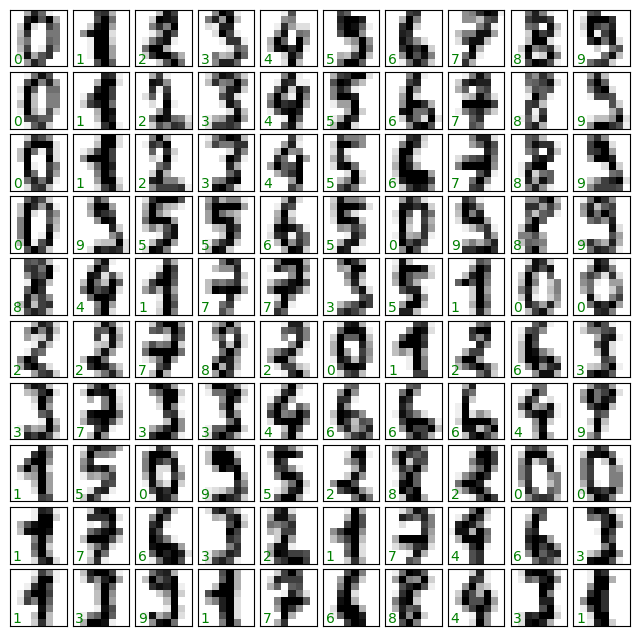

In [28]:
digits = load_digits()
fig, axes = plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes,color='green')

Определяем матрицу признаков и верные решения целевой переменной

In [29]:
X = digits.data
y = digits.target

Используем Isomap для понижения размерности данных с целью их более наглядного представления

In [30]:
from sklearn.manifold import Isomap 
iso = Isomap(n_components=2, n_neighbors=10)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

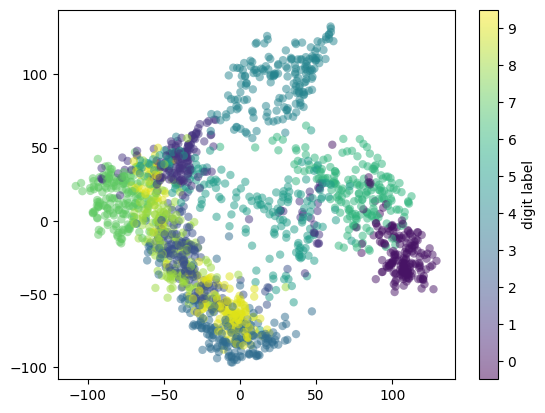

In [31]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none',alpha=0.5, cmap=plt.colormaps['viridis'])
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5,9.5)

Обучаем саму модель и пытаемся предсказать с её помощью значения целевой переменной. Получаем сравнительно неплохой результат

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=0)
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)
accuracy_score(ytest, y_model)

0.8333333333333334

Используем матрицу отличий для получения информации о том, какие цифры модель могла предсказать неверно

Text(113.9222222222222, 0.5, 'true value')

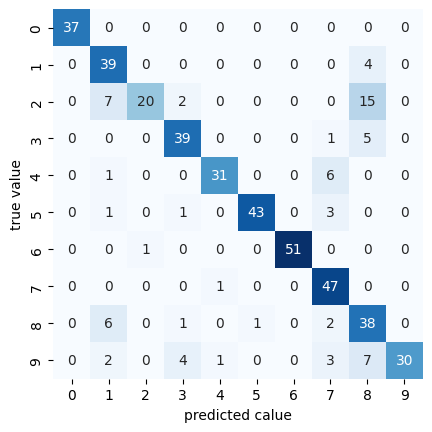

In [33]:
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False,cmap='Blues')
plt.xlabel('predicted calue')
plt.ylabel('true value')